In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [2]:
train = pd.read_csv('data/training_sample.csv')

In [3]:
train.head(5)

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [4]:
train

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455396,5624-06d73a79-5624-450a-acdd-367154,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
455397,42a3-06d74c74-42a3-4dc9-b874-727916,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
455398,104a-06d7a875-104a-428d-b2b8-358312,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
455399,d9b1-06d7a928-d9b1-40d9-a2d6-32624,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
train.dtypes

UserID                     object
basket_icon_click           int64
basket_add_list             int64
basket_add_detail           int64
sort_by                     int64
image_picker                int64
account_page_click          int64
promo_banner_click          int64
detail_wishlist_add         int64
list_size_dropdown          int64
closed_minibasket_click     int64
checked_delivery_detail     int64
checked_returns_detail      int64
sign_in                     int64
saw_checkout                int64
saw_sizecharts              int64
saw_delivery                int64
saw_account_upgrade         int64
saw_homepage                int64
device_mobile               int64
device_computer             int64
device_tablet               int64
returning_user              int64
loc_uk                      int64
ordered                     int64
dtype: object

In [6]:
train.shape

(455401, 25)

In [7]:
print(train.describe())

       basket_icon_click  basket_add_list  basket_add_detail        sort_by  \
count      455401.000000    455401.000000      455401.000000  455401.000000   
mean            0.099150         0.074521           0.112916       0.036849   
std             0.298864         0.262617           0.316490       0.188391   
min             0.000000         0.000000           0.000000       0.000000   
25%             0.000000         0.000000           0.000000       0.000000   
50%             0.000000         0.000000           0.000000       0.000000   
75%             0.000000         0.000000           0.000000       0.000000   
max             1.000000         1.000000           1.000000       1.000000   

        image_picker  account_page_click  promo_banner_click  \
count  455401.000000       455401.000000       455401.000000   
mean        0.026735            0.003570            0.016208   
std         0.161307            0.059647            0.126274   
min         0.000000            

In [8]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [9]:
train.loc_uk.unique()

array([1, 0], dtype=int64)

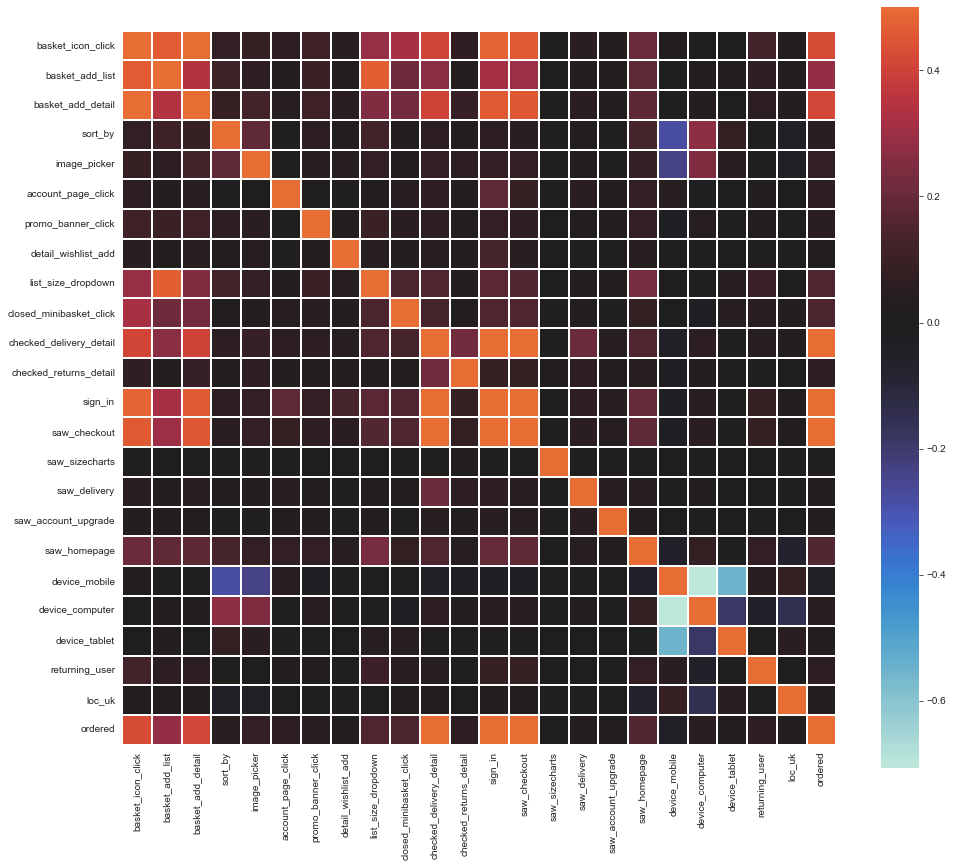

In [10]:
# To check the correlation between columns:
import seaborn as sns
corr = train.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,square=True, linewidths=2)
plt.savefig("heatmap.png")
plt.show()

In [11]:
train.corr()['ordered']

basket_icon_click          0.428334
basket_add_list            0.287666
basket_add_detail          0.414420
sort_by                    0.054636
image_picker               0.071492
account_page_click         0.057279
promo_banner_click         0.056533
detail_wishlist_add        0.023516
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
checked_delivery_detail    0.798720
checked_returns_detail     0.059484
sign_in                    0.665556
saw_checkout               0.708986
saw_sizecharts             0.007548
saw_delivery               0.031461
saw_account_upgrade        0.025857
saw_homepage               0.157778
device_mobile             -0.042907
device_computer            0.049208
device_tablet              0.016939
returning_user             0.060295
loc_uk                     0.031643
ordered                    1.000000
Name: ordered, dtype: float64

In [12]:
# Drop columns with low correlation and 'ordered' as it is our target.
predictors = train.drop(['ordered','UserID','device_mobile'], axis=1)
targets = train.ordered

In [13]:
predictors.shape

(455401, 22)

In [14]:
print(predictors.columns)

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_computer', 'device_tablet', 'returning_user',
       'loc_uk'],
      dtype='object')


In [15]:
# Splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [43]:
lr.score(X_train,y_train)

0.9932147562582345

In [44]:
lr.score(X_test,y_test)

0.992940349798531

In [45]:
predict = lr.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
prob = lr.predict_proba(X_test)
prob

array([[9.99996387e-01, 3.61254507e-06],
       [9.99994838e-01, 5.16218325e-06],
       [9.99996387e-01, 3.61254507e-06],
       ...,
       [9.99994246e-01, 5.75422225e-06],
       [9.99996719e-01, 3.28084713e-06],
       [9.99994838e-01, 5.16218325e-06]])

IndexError: Inconsistent shape between the condition and the input (got (91081, 1) and (91081,))

In [67]:
df_prob = pd.DataFrame(prob , columns=['prob_buy', 'prob_dont_buy'])

<AxesSubplot:>

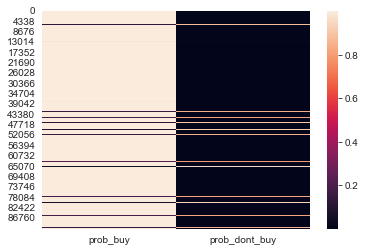

In [68]:
sns.heatmap(df_prob)

In [70]:
df_prob

,prob_buy,prob_dont_buy
0,0.999996,0.000004
1,0.999995,0.000005
2,0.999996,0.000004
3,0.981136,0.018864
4,0.999994,0.000006
...,...,...
91076,0.999999,0.000001
91077,0.999996,0.000004
91078,0.999994,0.000006
91079,0.999997,0.000003


In [ ]:
sns.displot(df_prob, x="prob_buy")

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cross_val_score(lr, X_train, y_train)

array([0.99352218, 0.99338494, 0.99322025, 0.99301438, 0.99287714])

In [24]:
# Now let us predict on the previous days visitors.
# First start by loading in our sample data of the previous days visitors who did not order.
yesterdays_prospect = pd.read_csv('data/testing_sample.csv')

In [25]:
yesterdays_prospect.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,9d24-25k4-47889d24-25k4-494b-398124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,7732-1k58-47887732-1k58-4475-679678,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,94k2-632j-471394k2-632j-4b4j-228160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,jdd8-419d-4714jdd8-419d-4198-674376,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,7473-7595-47147473-7595-4757-227547,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
print(yesterdays_prospect.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151655 entries, 0 to 151654
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   151655 non-null  object
 1   basket_icon_click        151655 non-null  int64 
 2   basket_add_list          151655 non-null  int64 
 3   basket_add_detail        151655 non-null  int64 
 4   sort_by                  151655 non-null  int64 
 5   image_picker             151655 non-null  int64 
 6   account_page_click       151655 non-null  int64 
 7   promo_banner_click       151655 non-null  int64 
 8   detail_wishlist_add      151655 non-null  int64 
 9   list_size_dropdown       151655 non-null  int64 
 10  closed_minibasket_click  151655 non-null  int64 
 11  checked_delivery_detail  151655 non-null  int64 
 12  checked_returns_detail   151655 non-null  int64 
 13  sign_in                  151655 non-null  int64 
 14  saw_checkout        

In [27]:
print(yesterdays_prospect.head(50))

                                 UserID  basket_icon_click  basket_add_list  \
0   9d24-25k4-47889d24-25k4-494b-398124                  0                0   
1   7732-1k58-47887732-1k58-4475-679678                  0                0   
2   94k2-632j-471394k2-632j-4b4j-228160                  0                0   
3   jdd8-419d-4714jdd8-419d-4198-674376                  0                0   
4   7473-7595-47147473-7595-4757-227547                  0                0   
5   7j3d-j382-47157j3d-j382-4d3b-955343                  1                0   
6   bb4d-8019-4715bb4d-8019-4d42-763898                  0                0   
7   d09k-j446-4716d09k-j446-4469-572703                  0                0   
8    1397-7143-47171397-7143-4969-95351                  1                1   
9   3j36-dj4d-47183j36-dj4d-4478-404497                  0                0   
10   82b1-659j-471882b1-659j-45j1-32901                  0                0   
11  dj8d-141k-4718dj8d-141k-42db-743965             

In [28]:

userids = yesterdays_prospect['UserID']
yesterdays_prospect = yesterdays_prospect.drop(['ordered','UserID','device_mobile'], axis=1)

print(yesterdays_prospect.head(10))

   basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
0                  0                0                  0        0   
1                  0                0                  0        0   
2                  0                0                  0        0   
3                  0                0                  1        0   
4                  0                0                  0        0   
5                  1                0                  1        0   
6                  0                0                  0        0   
7                  0                0                  0        0   
8                  1                1                  1        0   
9                  0                0                  0        0   

   image_picker  account_page_click  promo_banner_click  detail_wishlist_add  \
0             0                   0                   0                    0   
1             0                   0                   0                    0   


In [29]:
yesterdays_prospect.shape

(151655, 22)

In [30]:
yesterdays_prospect['propensity'] = lr.predict_proba(yesterdays_prospect)[:,1]


In [31]:
yesterdays_prospect

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk,propensity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000004
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000004
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000004
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000008
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0.000010
151651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.000003
151652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.000007
151653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.000007


In [32]:
pd.DataFrame(userids)
results = pd.concat([userids, yesterdays_prospect], axis=1)

In [33]:
print(results.head(30))

                                 UserID  basket_icon_click  basket_add_list  \
0   9d24-25k4-47889d24-25k4-494b-398124                  0                0   
1   7732-1k58-47887732-1k58-4475-679678                  0                0   
2   94k2-632j-471394k2-632j-4b4j-228160                  0                0   
3   jdd8-419d-4714jdd8-419d-4198-674376                  0                0   
4   7473-7595-47147473-7595-4757-227547                  0                0   
5   7j3d-j382-47157j3d-j382-4d3b-955343                  1                0   
6   bb4d-8019-4715bb4d-8019-4d42-763898                  0                0   
7   d09k-j446-4716d09k-j446-4469-572703                  0                0   
8    1397-7143-47171397-7143-4969-95351                  1                1   
9   3j36-dj4d-47183j36-dj4d-4478-404497                  0                0   
10   82b1-659j-471882b1-659j-45j1-32901                  0                0   
11  dj8d-141k-4718dj8d-141k-42db-743965             

In [34]:
# This will help the business know who to target in the future